<a href="https://colab.research.google.com/github/DanulR/Danul-Rochana-AI-Projects/blob/main/Linear_regression_with_one_input_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
my_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Linear Regression - Sheet1.csv') # Replace 'my_dataset.csv' with your dataset file name

# Split the dataset into features and labels
my_feature = my_data['X']
my_label = my_data['Y']

In [3]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  # squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse




In [4]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
 
  x0 = 0
  y0 = trained_bias
  x1 = feature.iloc[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/200
25/25 [==============================] - 1s 5ms/step - loss: 8511.2920 - root_mean_squared_error: 92.2567
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 7714.3682 - root_mean_squared_error: 87.8315
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 7026.1118 - root_mean_squared_error: 83.8219
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 6366.3208 - root_mean_squared_error: 79.7892
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 5745.8579 - root_mean_squared_error: 75.8014
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 5150.0103 - root_mean_squared_error: 71.7636
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 4597.7295 - root_mean_squared_error: 67.8066
Epoch 8/200
25/25 [==============================] - 0s 7ms/step - loss: 4078.1396 - root_mean_squared_error: 63.8603
Epoch 9/200
25/25 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


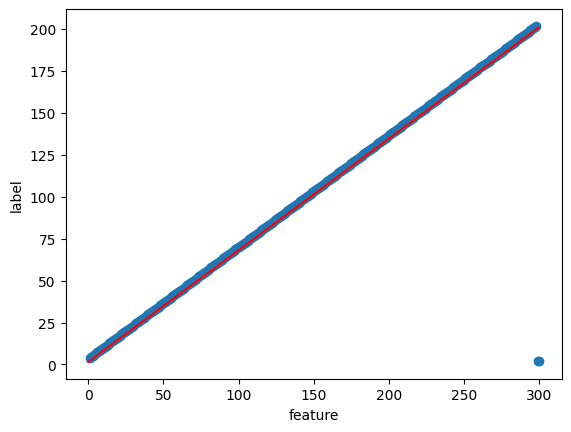

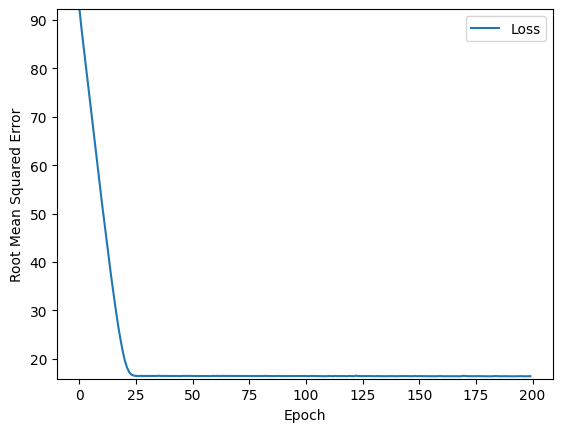

In [5]:
learning_rate=0.05
epochs=200
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


In [6]:
my_model.save('my_trained_model')

# Load the saved model
loaded_model = tf.keras.models.load_model('my_trained_model')

# Use the loaded model to make predictions on new data
new_feature = pd.Series([250, 275, 300])
new_label_pred = loaded_model.predict(new_feature)
print(new_label_pred)

1/1 [==============================] - 0s 83ms/step
[[167.84505]
 [184.47882]
 [201.1126 ]]
